In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.generalized_logistic import Logistic
from hb_mep.utils import (plot_fitted, plot_kde)

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, data_dict, encoders_dict = data.build()

2023-02-24 14:45:16,419 - hb_mep.data_access.core - INFO - Reading data ....
2023-02-24 14:45:16,425 - hb_mep.data_access.core - INFO - Processing data ...
2023-02-24 14:45:16,435 - hb_mep.utils.utils - INFO - func:build took: 0.02 sec


In [5]:
data_dict.keys()

dict_keys(['num_participants', 'num_segments', 'segments_per_participant', 'total_combinations', 'intensity', 'Biceps', 'participant', 'level'])

In [6]:
encoders_dict.keys()

dict_keys(['participant_encoder', 'segment_encoder'])

#### Initialize model

In [7]:
model = Logistic(config)

#### Run MCMC inference

In [8]:
mcmc, posterior_samples = model.sample(data_dict=data_dict)

2023-02-24 14:45:17,260 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-02-24 14:45:17,261 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-24 14:45:17,261 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-24 14:45:17,263 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-02-24 14:45:17,264 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-02-24 14:45:17,316 - hb_mep.models.baseline - INFO - Running inference ...

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

#### Diagnostics

In [9]:
mcmc.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
                     a[0,0]      4.26      0.07      4.25      4.18      4.36     10.89      1.13
                     a[1,0]      2.94      0.11      2.92      2.80      3.13     12.09      1.11
                     a[2,0]      3.96      4.22      6.25     -2.76      6.33      2.21      3.17
             a_global_scale      1.73      1.15      1.41      0.10      3.40     10.08      1.12
          a_level_mean[0,0]      3.69      1.31      3.91      0.94      5.43     52.50      1.04
          a_level_mean[1,0]      2.76      1.09      2.85      0.59      4.21   1704.64      1.01
          a_level_mean[2,0]      4.88      2.76      5.97      0.00      8.14      2.89      1.80
  a_level_mean_global_scale      4.79      2.00      4.71      1.46      7.78     14.33      1.09
         a_level_scale[0,0]      1.30      1.39      0.80      0.02      3.09     18.64      1.07
         a_level_sc

#### Plot fitted curves

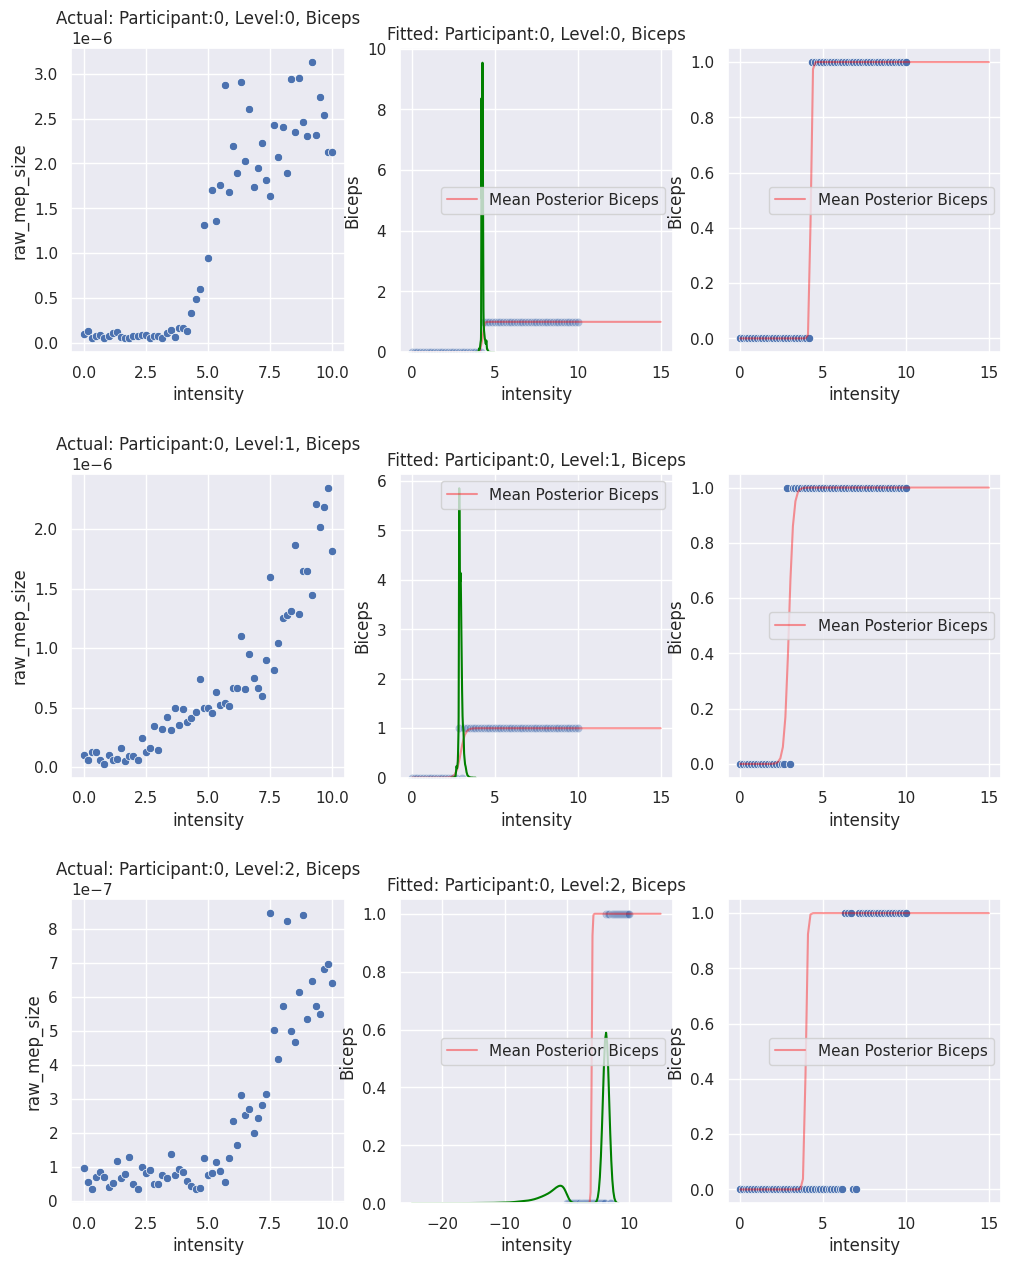

In [10]:
plot_fitted(df=df, data_dict=data_dict, encoders_dict=encoders_dict, posterior_samples=posterior_samples, model_function='sigmoid');

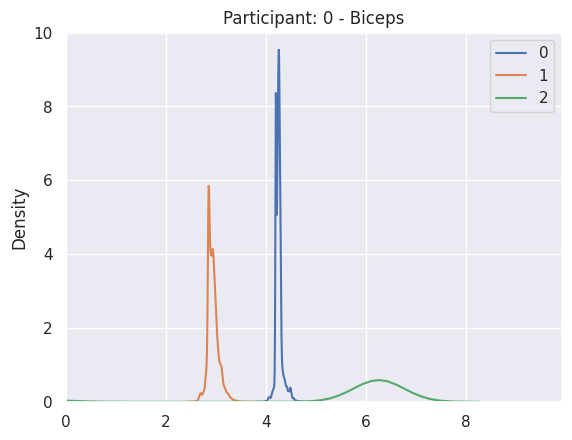

In [11]:
plot_kde(data_dict=data_dict, posterior_samples=posterior_samples);